In [104]:
import numpy as np
import pandas as pd
from scipy import stats
from pandas_datareader import data as wb
from scipy.stats import norm
import matplotlib.pyplot as plt

In [105]:
rev_m = 170
rev_stdev = 20
iterations = 1000

In [106]:
rev = np.random.normal(rev_m,rev_stdev,iterations) # 1000 simulations of revenue with a standard deviation of 20 and revenue mean of 170
rev

array([161.45943331, 164.86509233, 188.12805343, 157.75567649,
       145.79196635, 201.88440725, 154.88026018, 184.03048438,
       192.54577485, 178.72623692, 184.25696415, 202.3055658 ,
       145.09387097, 172.93877917, 161.81021622, 125.93402887,
       175.42277122, 168.59348803, 177.9302674 , 160.72563554,
       135.54881709, 195.88736369, 177.23141526, 197.08815242,
       133.70851569, 199.46352662, 165.88119074, 155.29592637,
       143.33020864, 120.43263284, 194.44924694, 182.62934978,
       148.90429677, 167.20994373, 181.28661219, 145.42535012,
       178.50168725, 155.99830038, 168.98592283, 196.96260952,
       183.65172154, 181.46793785, 152.08681573, 175.04930769,
       191.99780752, 181.81292579, 172.85181665, 148.40726192,
       159.10700518, 179.18659699, 155.90497986, 142.59432129,
       183.77892551, 167.5239242 , 197.22493396, 201.27053374,
       167.92874574, 194.94948358, 167.25408177, 167.64567062,
       143.87198675, 179.20323556, 175.59833313, 123.80

<function matplotlib.pyplot.show(close=None, block=None)>

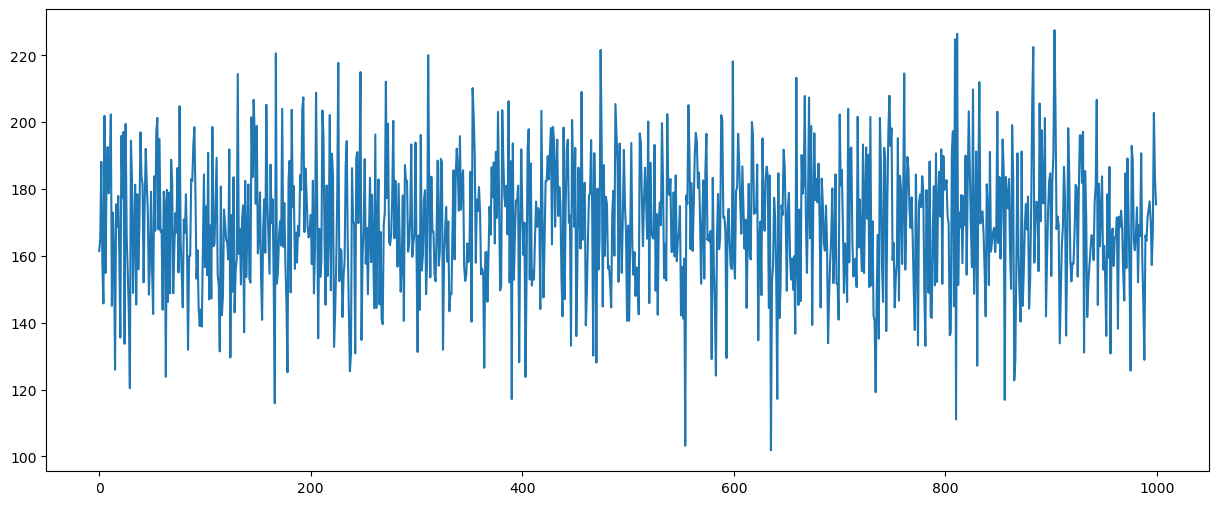

In [107]:
plt.figure(figsize = (15,6)) 
plt.plot(rev)
plt.show

In [108]:
COGS = (rev * np.random.normal(0.60,0.10)) # derived from Rev, 1000 simulations of COGS with a % cost(60%) and Standard devaition (10%)
COGS

array([ 97.9348407 , 100.00057738, 114.11096005,  95.68828981,
        88.43158128, 122.4550146 ,  93.94417717, 111.62553839,
       116.79057334, 108.40819383, 111.76291197, 122.71047255,
        88.00814452, 104.89775321,  98.1476116 ,  76.38654988,
       106.40444353, 102.26207323, 107.92539052,  97.48974829,
        82.21849623, 118.81744761, 107.50149474, 119.54579807,
        81.10224294, 120.98660515, 100.61690207,  94.19630367,
        86.93837742,  73.04962287, 117.94514345, 110.77566613,
        90.31939655, 101.42287054, 109.96121516,  88.20920652,
       108.27199097,  94.62233568, 102.5001085 , 119.46964876,
       111.39579599, 110.07120006,  92.24978539, 106.17791548,
       116.45819825, 110.28045596, 104.84500522,  90.01791507,
        96.50795179, 108.68742985,  94.56573118,  86.49201756,
       111.47295283, 101.61331855, 119.62876429, 122.08266346,
       101.85886712, 118.24856701, 101.44964292, 101.68716506,
        87.26699837, 108.69752214, 106.51093237,  75.09

<function matplotlib.pyplot.show(close=None, block=None)>

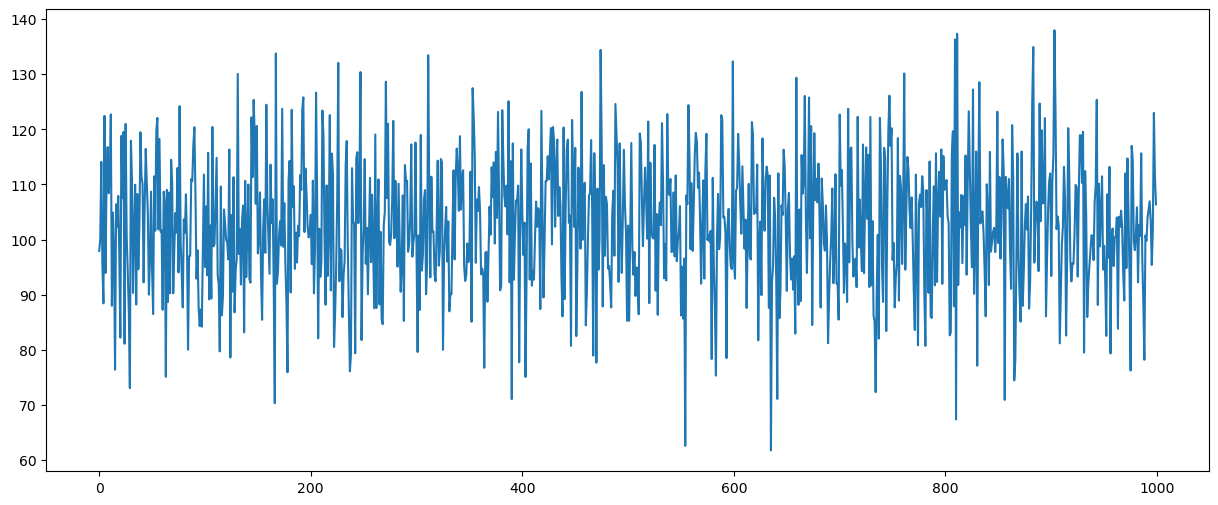

In [109]:
plt.figure(figsize = (15,6))
plt.plot(COGS)
plt.show

In [110]:
COGS.mean()

102.72009757765993

In [111]:
COGS.std()

11.97688645257187

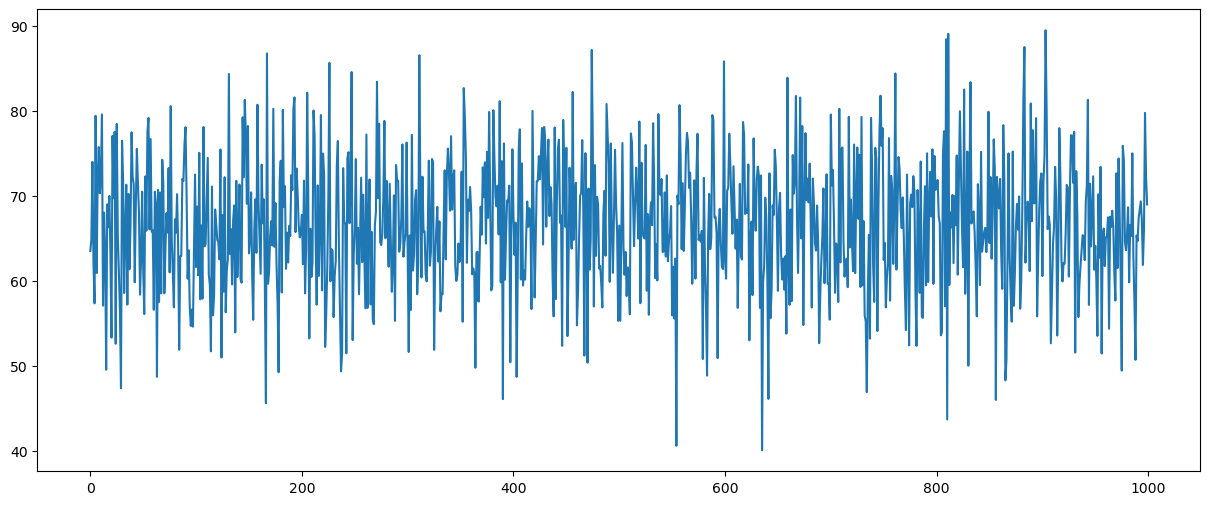

In [112]:
Gross_profit = rev - COGS
Gross_profit 

plt.figure(figsize = (15,6))
plt.plot(Gross_profit)
plt.show()

In [113]:
max(Gross_profit)

89.49959752564519

In [114]:
min(Gross_profit)

40.07021679469291

In [115]:
Gross_profit.mean()

66.62850835211718

In [116]:
Gross_profit.std()

7.768704448846801

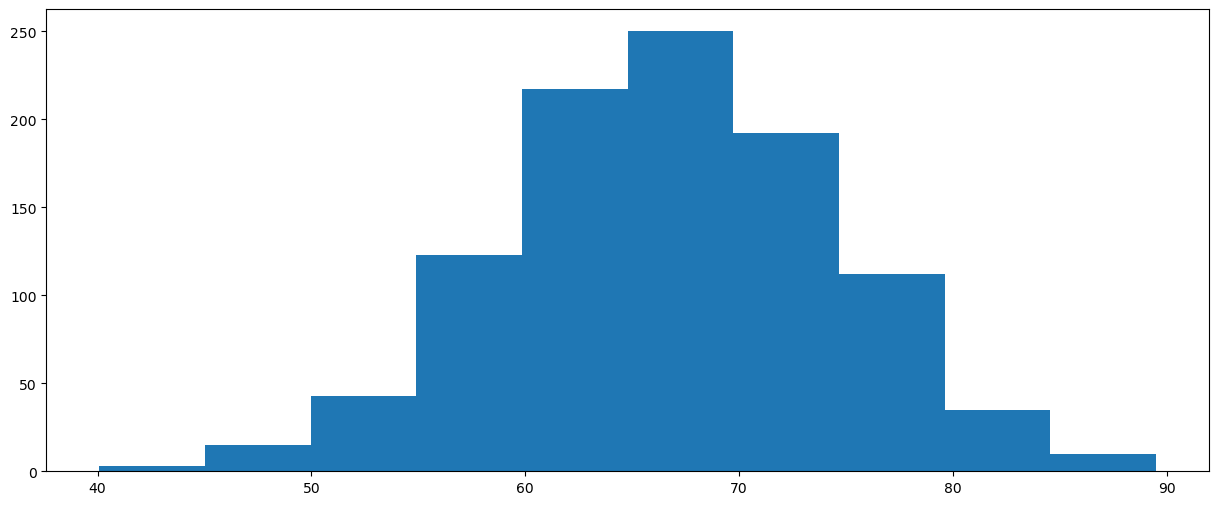

In [117]:
plt.figure(figsize=(15,6))
plt.hist(Gross_profit,bins=10)
plt.show()

# MONTE CARLO - FORECASTING STOCK PRICES

In [118]:
import yfinance as yf
tickers = ['PG']
stock_data = pd.DataFrame()

In [119]:
for t in tickers:
    data=yf.Ticker(t)
    stock_data[t]= data.history(start = '2013-03-17')['Close']

In [120]:
stock_data.tail()

,PG
Date,
2024-02-23 00:00:00-05:00,161.029999
2024-02-26 00:00:00-05:00,160.220001
2024-02-27 00:00:00-05:00,159.300003
2024-02-28 00:00:00-05:00,160.050003
2024-02-29 00:00:00-05:00,158.764999


In [121]:
log_returns = np.log(1 + stock_data.pct_change())
log_returns

,PG
Date,
2013-03-18 00:00:00-04:00,NaN
2013-03-19 00:00:00-04:00,0.012396
2013-03-20 00:00:00-04:00,0.006077
2013-03-21 00:00:00-04:00,-0.004781
2013-03-22 00:00:00-04:00,0.000777
...,...
2024-02-23 00:00:00-05:00,0.002923
2024-02-26 00:00:00-05:00,-0.005043
2024-02-27 00:00:00-05:00,-0.005759


<Axes: xlabel='Date'>

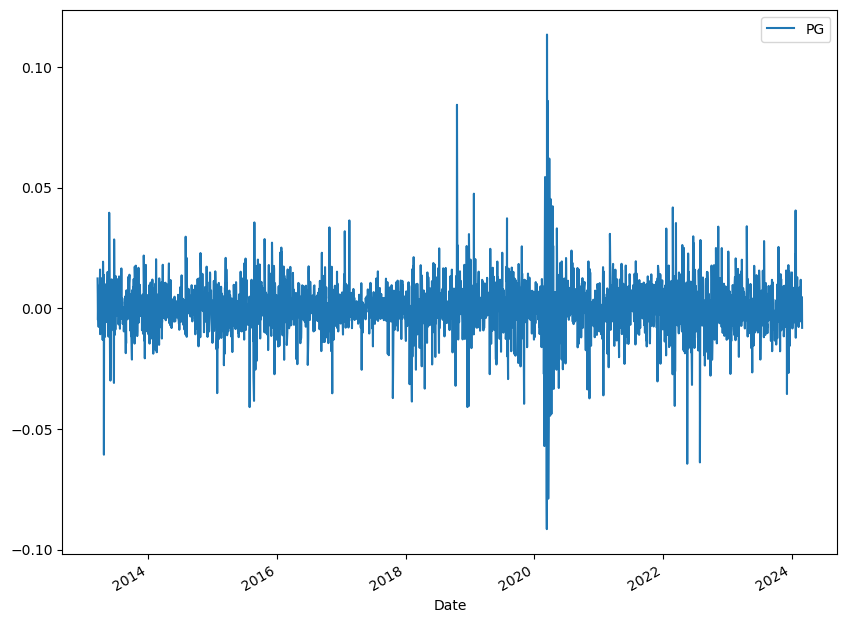

In [122]:
log_returns.plot(figsize=(10,8))

In [123]:
PG_mean = log_returns.mean()
PG_mean

PG    0.000381
dtype: float64

In [124]:
var = log_returns.var()
var

PG    0.000129
dtype: float64

In [125]:
std = log_returns.std()
std

PG    0.011378
dtype: float64

In [126]:
drift = PG_mean - (0.5*var)
drift

PG    0.000317
dtype: float64

In [127]:
type(drift)

pandas.core.series.Series

In [128]:
drift.values

array([0.00031651])

In [129]:
std.values

array([0.01137802])

In [130]:
z = norm.ppf(np.random.rand(10,2)) # Z is the distance between the mean and events express as a number of standard deviations
z #norm.ppf helps us to get z example

array([[-1.36815034, -0.50560781],
       [ 0.47068019, -1.15038347],
       [ 0.03280861, -0.47790748],
       [ 1.38280042,  0.10964956],
       [ 0.55432019,  1.88709134],
       [ 1.24315834, -0.29724958],
       [ 0.98645569,  0.76613518],
       [-0.59961833, -1.05929453],
       [ 1.1297383 , -1.00628055],
       [-1.18348709, -0.62664978]])

In [131]:
t_intervals = 1000 #we want to predict stock prices for the next 1000 days
iterations = 10

In [132]:
daily_returns = np.exp(drift.values + std.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [133]:
daily_returns

array([[1.02274818, 1.00294723, 0.99116904, ..., 0.99669168, 0.98397349,
        0.99421229],
       [1.00106193, 1.00374356, 0.97733426, ..., 1.00411447, 1.02012798,
        0.99003228],
       [1.01762626, 0.99505186, 0.98032884, ..., 0.99974565, 1.01443385,
        0.99056837],
       ...,
       [0.99495563, 0.99167196, 0.98714179, ..., 0.9978815 , 0.9849485 ,
        1.01027075],
       [0.98988044, 0.98935687, 0.99313686, ..., 1.00139533, 0.99063984,
        1.00319338],
       [1.0175986 , 0.99307864, 0.97813823, ..., 0.98219849, 1.0035639 ,
        1.01968254]])

In [134]:
SO = stock_data.iloc[-1] #ilocp[-1] helps us indicate want the latest price in our table
SO

PG    158.764999
Name: 2024-02-29 00:00:00-05:00, dtype: float64

In [135]:
price_list = np.zeros_like(daily_returns) # To create and Array similar in dimension to one reference but filled with zeros

In [136]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [137]:
price_list[0] = SO
price_list

array([[158.76499939, 158.76499939, 158.76499939, ..., 158.76499939,
        158.76499939, 158.76499939],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [138]:
for t in range(1,t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

price_list

array([[158.76499939, 158.76499939, 158.76499939, ..., 158.76499939,
        158.76499939, 158.76499939],
       [158.93359617, 159.35934639, 155.16647362, ..., 159.41823253,
        161.9606174 , 157.18247362],
       [161.7350015 , 158.57081347, 152.11416905, ..., 159.37768418,
        164.29833313, 155.6999864 ],
       ...,
       [263.87433676, 191.97093032, 216.76455685, ..., 273.12110505,
        140.08783202, 224.80462693],
       [261.20404515, 189.92775822, 215.27687167, ..., 273.50219845,
        138.77658772, 225.52251385],
       [265.80087116, 188.61319959, 210.57053788, ..., 268.63344647,
        139.27117369, 229.96137031]])

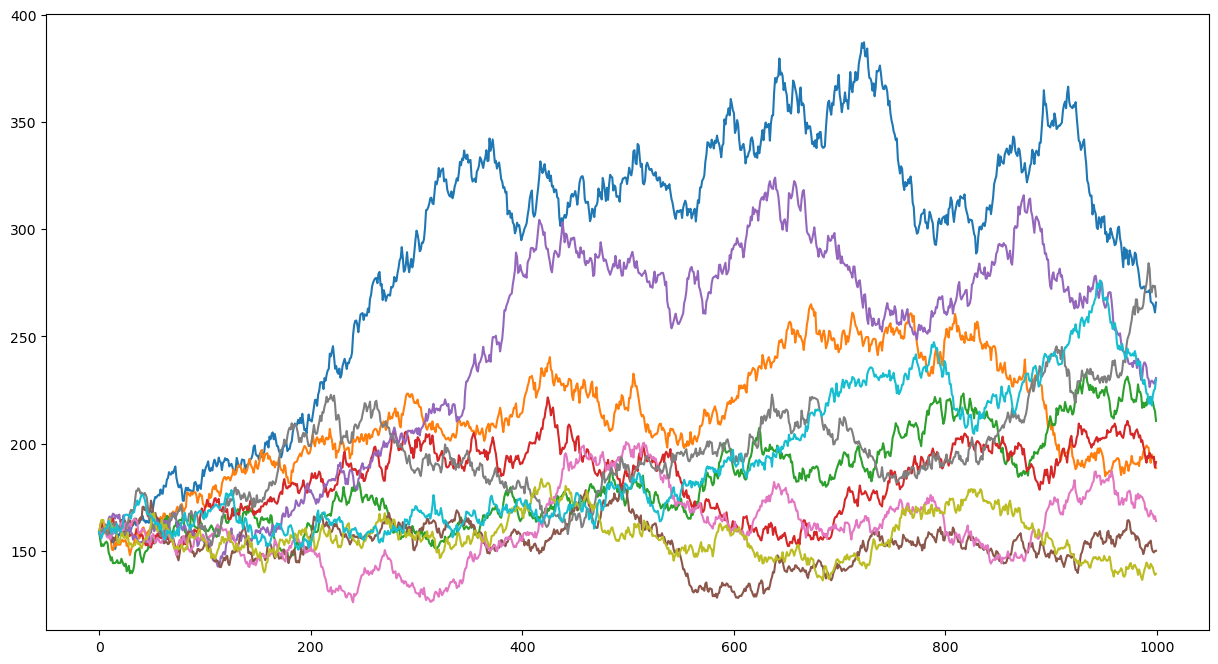

In [139]:
plt.figure(figsize = (15,8))
plt.plot(price_list);

In [140]:
price_list[999]

array([265.80087116, 188.61319959, 210.57053788, 191.37194016,
       230.57432687, 150.00999681, 163.88308964, 268.63344647,
       139.27117369, 229.96137031])

# MONTE CARLO - DERIVATIES AND OPTION PRICING(Black Scholes Formula) 

In [144]:
def d1(S, K, r, stdev, T):
    return (np.log(S / K) + (r + stdev ** 2/2) * T) / (stdev * np.sqrt(T))

In [145]:
def d2(S, K, r, stdev, T): 
    return (np.log(S / K) + (r - stdev ** 2/2) * T) / (stdev * np.sqrt(T))

In [147]:
norm.cdf(0) #Cumulative Distributive function(cdf) between 0 - 1

0.5

In [148]:
def BSF(S, K, r, stdev, T):
    return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev, T)))

In [150]:
S = stock_data.iloc[-1]
S

PG    158.764999
Name: 2024-02-29 00:00:00-05:00, dtype: float64

In [151]:
stdev = log_returns.std()*250 ** 0.5
stdev

PG    0.179902
dtype: float64

In [152]:
r = 0.025
K = 110.0
T = 1

In [153]:
d1(S, K, r, stdev, T)

PG    2.268604
dtype: float64

In [154]:
d2(S, K, r, stdev, T)

PG    2.088702
dtype: float64

In [155]:
BSF(S, K, r, stdev, T)

PG    51.602417
Name: 2024-02-29 00:00:00-05:00, dtype: float64

# MONTE CARLO - DERIVATIVES AND OPTIONS PRICING(EULER DISCRETIZATION)

In [161]:
type(stdev)

numpy.ndarray

In [162]:
T = 1
t_intervals = 250
delta_t = T / t_intervals

iterations = 10000

In [164]:
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
SO = stock_data.iloc[-1]
S[0] = SO

In [165]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r- 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [166]:
S # Calculation of Simulation

array([[158.76499939, 158.76499939, 158.76499939, ..., 158.76499939,
        158.76499939, 158.76499939],
       [157.96481737, 157.77416235, 159.40630825, ..., 156.69773508,
        158.00589021, 159.82299147],
       [160.36381689, 159.18202713, 165.1198107 , ..., 156.71518584,
        162.6481941 , 158.6492064 ],
       ...,
       [181.97775643, 119.88095837, 212.24948704, ..., 146.53776443,
        140.49896061, 155.59591089],
       [181.9760794 , 116.8840142 , 209.48237619, ..., 142.73810881,
        139.261185  , 158.03396393],
       [182.72742184, 116.16132148, 210.02023379, ..., 142.65380619,
        139.33207253, 155.36177557]])

In [167]:
S.shape

(251, 10000)

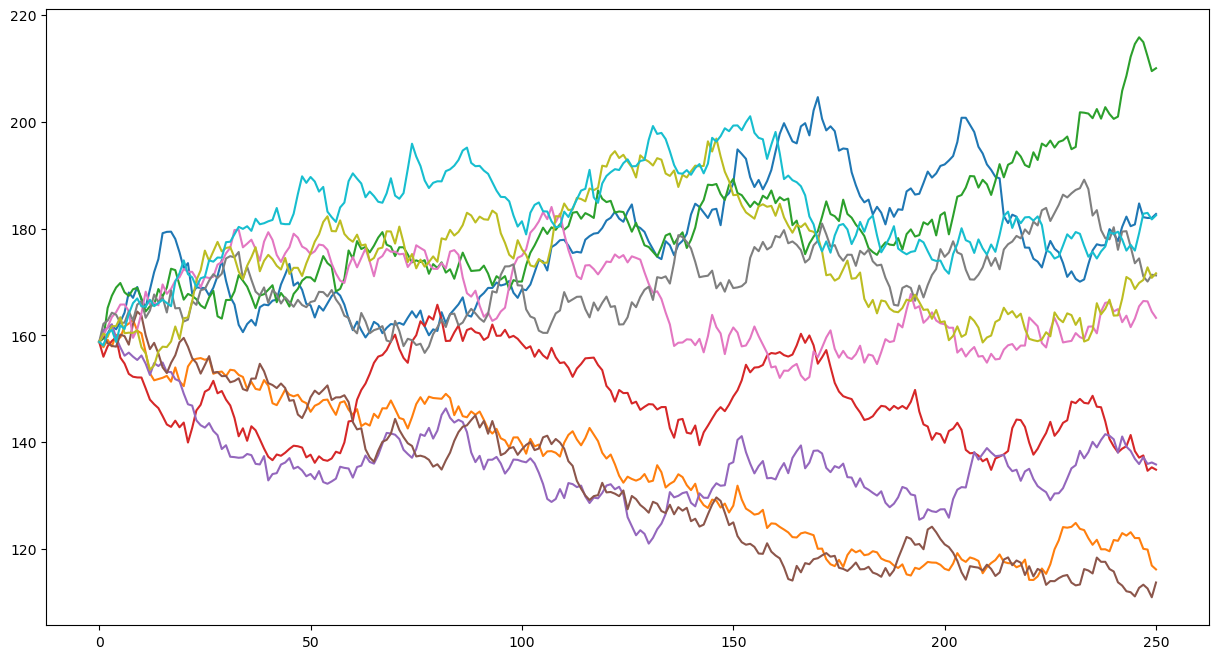

In [169]:
plt.figure(figsize = (15,8))
plt.plot(S[:, :10]);

In [172]:
p = np.maximum(S[-1] - 100, 0)

In [173]:
p.shape

(10000,)

In [174]:
C = np.exp(-r * T) * np.sum(p) / iterations

In [175]:
C

61.060511696121466